# Car Price Prediction

In [142]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [143]:
# Reading data for the CarPrice_Assignment file
df=pd.read_csv(r"C:\Apps\Abhinav_Sharma\Abhinav DND\Upgrad\Machine Learning\Linear Regression\Assignment\CarPrice_Assignment.csv")

In [144]:
#Viewing the dataframe
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###### Checking for duplicate ids

In [145]:
# Make sure that number of duplicate rows are zero
sum(df.duplicated(subset = "car_ID")) == 0

True

#### Creating a new column CompanyName

In [146]:
#Extracting the company name into a new column CompanyName
df['CompanyName']=df.CarName.str.split(expand=True)[0]

In [147]:
#Re-ordering the dataframe by introducing CompanyName at the start
cols = list(df.columns)
cols = [cols[0]]+[cols[-1]]+cols[1:-1]
df = df[cols]

# Dropping CarName column
df=df.drop(['CarName'],axis=1)
df=df.drop(['car_ID'],axis=1)

In [148]:
#Viewing the dataframe
df.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Primary Checks

In [149]:
#Checking the number of rows and columns of dataframe
df.shape

(205, 25)

In [150]:
#Checking the information of the entire dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
CompanyName         205 non-null object
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [151]:
# Checking the statistics of the dataframe df
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [152]:
# Viewing the columns in the dataframe df
df.columns

Index(['CompanyName', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Check for NA values in 'dataset'

In [153]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

CompanyName         0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
False
0


#### Cleansing

In [154]:
# Creating a list of categorical variables from df
cat_var=df.select_dtypes(include='object').columns
cat_var

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [155]:
# Retrieving frequency distribution for the variable CompanyName
print(df['CompanyName'].value_counts().to_frame(), end='\n\n')

             CompanyName
toyota                31
nissan                17
mazda                 15
honda                 13
mitsubishi            13
subaru                12
peugeot               11
volvo                 11
dodge                  9
volkswagen             9
buick                  8
bmw                    8
plymouth               7
audi                   7
saab                   6
porsche                4
isuzu                  4
alfa-romero            3
chevrolet              3
jaguar                 3
vw                     2
maxda                  2
renault                2
Nissan                 1
porcshce               1
mercury                1
vokswagen              1
toyouta                1



##### <font color = purple> We notice a bit of mismatches in the names of companies which need to be treated as part of EDA</font>

In [156]:
#Changing all the company names with their wrong spellings to their right counter parts
df['CompanyName']=df['CompanyName'].str.replace('toyouta','toyota')
df['CompanyName']=df['CompanyName'].str.replace('Nissan','nissan')
df['CompanyName']=df['CompanyName'].str.replace('maxda','mazda')
df['CompanyName']=df['CompanyName'].str.replace('vokswagen','volkswagen')
df['CompanyName']=df['CompanyName'].str.replace('vw','volkswagen')
df['CompanyName']=df['CompanyName'].str.replace('porcshce','porsche')

In [157]:
#Checking the count of unique comoany names after cleansing
len(df['CompanyName'].unique())

22

In [158]:
# Retrieving frequency distribution for the categorical variables' unique values
for i in cat_var:
    print(df[i].value_counts().to_frame(), end='\n\n')

             CompanyName
toyota                32
nissan                18
mazda                 17
mitsubishi            13
honda                 13
subaru                12
volkswagen            12
volvo                 11
peugeot               11
dodge                  9
buick                  8
bmw                    8
plymouth               7
audi                   7
saab                   6
porsche                5
isuzu                  4
jaguar                 3
chevrolet              3
alfa-romero            3
renault                2
mercury                1

        fueltype
gas          185
diesel        20

       aspiration
std           168
turbo          37

      doornumber
four         115
two           90

             carbody
sedan             96
hatchback         70
wagon             25
hardtop            8
convertible        6

     drivewheel
fwd         120
rwd          76
4wd           9

       enginelocation
front             202
rear                3

      

In [159]:
# Retrieving frequency distribution for the numerical int variables (unique values)
int_cols=df.select_dtypes(include='int64').columns   #getting all the integer type columns

for i in int_cols:
    print(df[i].value_counts().to_frame(), end='\n\n')

    symboling
 0         67
 1         54
 2         32
 3         27
-1         22
-2          3

      curbweight
2385           4
1989           3
1918           3
2275           3
3230           2
2410           2
3252           2
2337           2
2403           2
2414           2
2145           2
3139           2
2395           2
1876           2
1874           2
2128           2
1967           2
2380           2
4066           2
2756           2
2579           2
3075           2
2535           2
2548           2
1909           2
2191           2
2290           2
2024           2
2300           2
3151           1
...          ...
2707           1
3217           1
3770           1
2190           1
2094           1
2302           1
2443           1
2954           1
2261           1
2695           1
3740           1
3485           1
1951           1
2976           1
2952           1
2563           1
1971           1
1985           1
3505           1
2480           1
2734           1


In [160]:
# Retrieving frequency distribution for the numerical float variables (unique values)
float_cols=df.select_dtypes(include='float64').columns   #getting all the float type columns

for i in float_cols:
    print(df[i].value_counts().to_frame(), end='\n\n')

       wheelbase
94.5          21
93.7          20
95.7          13
96.5           8
98.4           7
97.3           7
96.3           6
107.9          6
98.8           6
99.1           6
104.3          6
100.4          6
93.1           5
97.2           5
102.4          5
109.1          5
95.9           5
101.2          4
97.0           4
114.2          4
95.3           4
105.8          3
103.5          3
110.0          3
89.5           3
99.8           2
86.6           2
113.0          2
104.5          2
104.9          2
88.6           2
96.9           2
91.3           2
115.6          2
102.9          2
96.1           2
103.3          2
112.0          1
99.5           1
88.4           1
99.2           1
96.0           1
102.0          1
106.7          1
93.0           1
99.4           1
93.3           1
102.7          1
120.9          1
95.1           1
96.6           1
94.3           1
108.0          1

       carlength
157.3         15
188.8         11
166.3          7
171.7        

In [161]:
#Viewing the dataframe after cleansing
df.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### <font color = purple> It confirms that the `integer and float columns` don't contain any irregular or inconsistent values and are fine for processing. Also the categorical variables have been treated above.</font>

In [162]:
#Defining a function cylinder to segregate the number of cylinders into three categories as the values look numeric
def cylinder(x):
    if x=='five' or x=='six':             #condition for checking the value equal to five or six
        x='five or six'                   # assign category as five or six
        return x                          #return the category
    if x=='eight' or x=='twelve':         #condition for checking the value equal to eight or twelve
        x='eight or twelve'               # assign category as eight or twelve
        return x                          #return the category
    else:
        x='four or less'                  # assign category as four or less
        return x                          #return the category

#Applying the function cylinder to the column cylindernumber and creating a new column
df['cylindernumber_mod']=df['cylindernumber'].apply(cylinder)   

In [163]:
#Dropping the parent column cylindernumber
df=df.drop(['cylindernumber'],axis=1)

# Visualising the Data

### Visualising Numeric Variables

In [164]:
#Creating a new dataframe numeric with only the numeric columns 
numeric=df[['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm','citympg', 'highwaympg','wheelbase', 
          'carlength', 'carwidth', 'carheight', 'boreratio',
          'stroke', 'compressionratio', 'price']]

**(i) Building regplots for separate columns**

In [165]:
#Taking all numeric columns excluding price
cols=list(numeric.columns)                            #taking all numeric columns in a list
cols.pop()                                            #removing price from the list

'price'

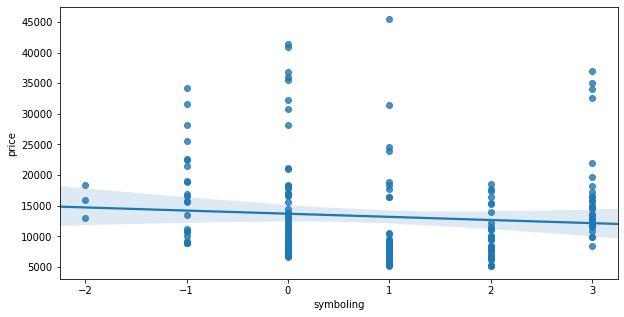

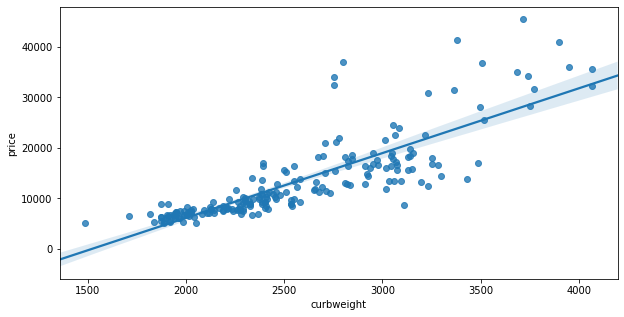

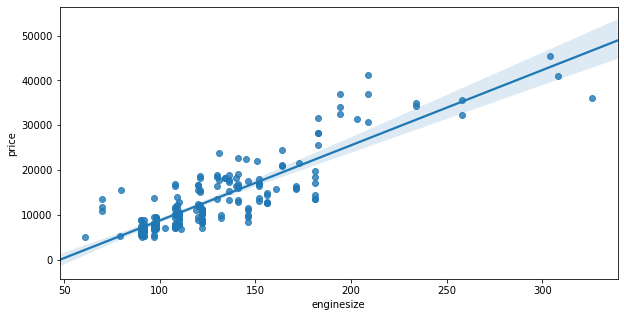

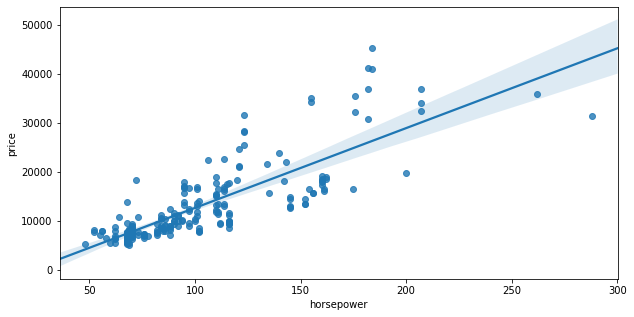

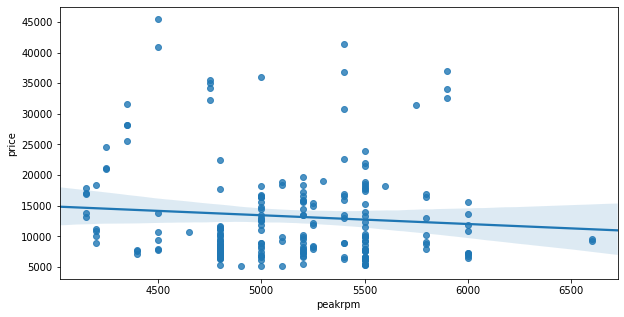

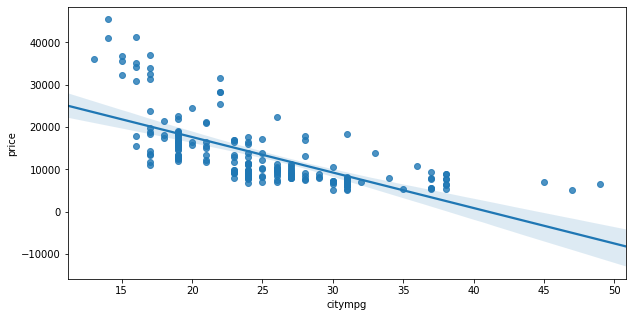

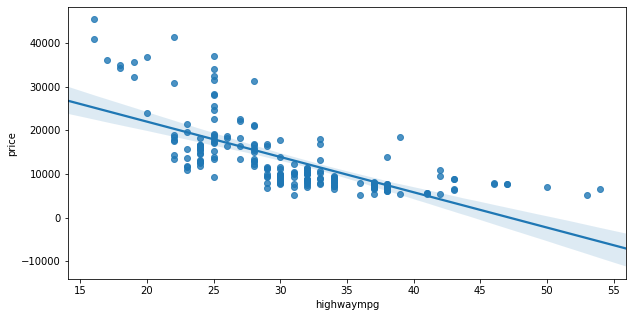

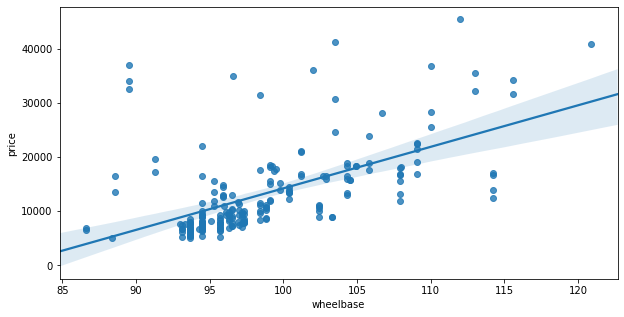

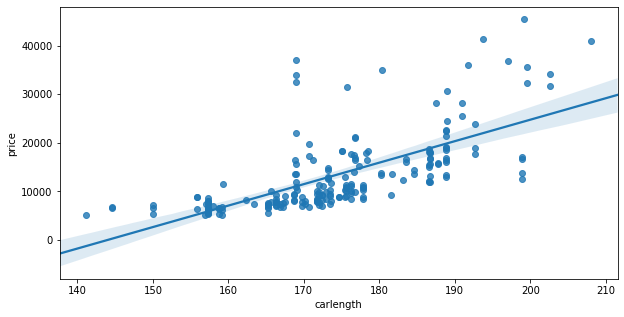

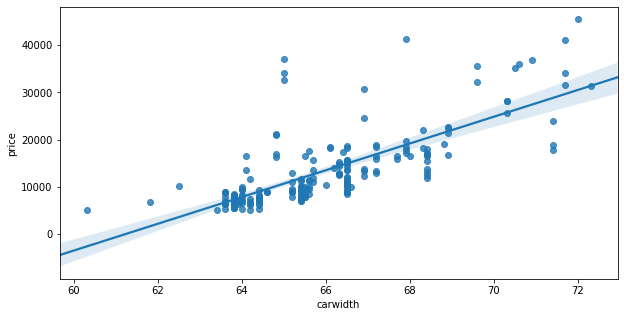

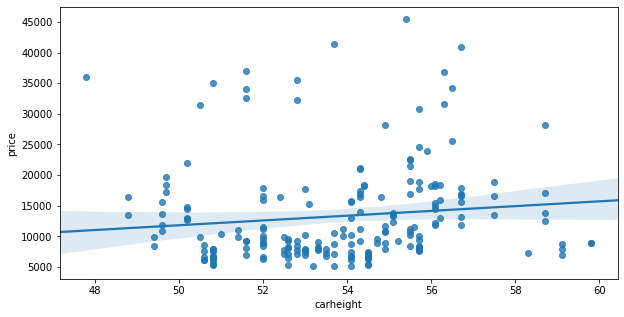

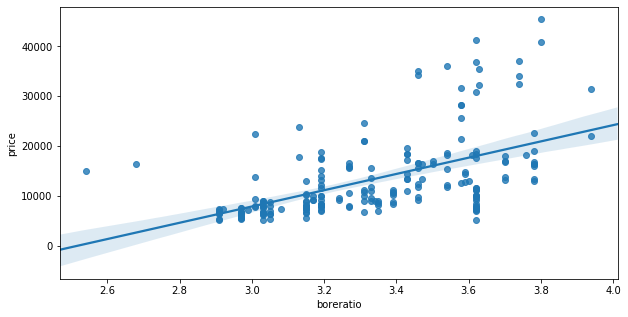

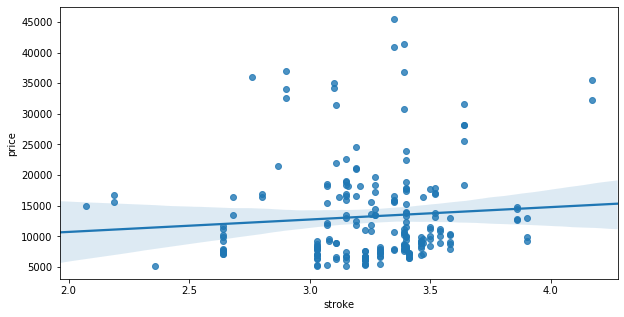

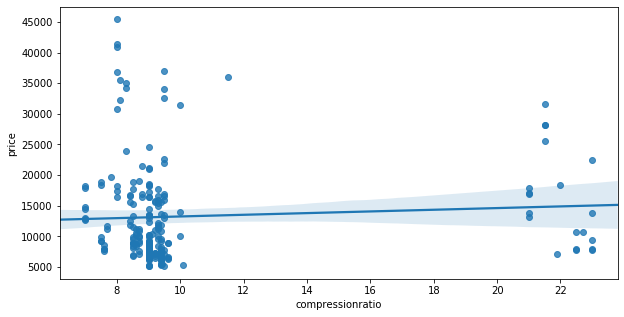

In [166]:
#Creating regplots for all numeric columns 
for i in cols:                                        #Creating a loop for all numeric variables
    plt.figure(1, figsize=(10,5))                     #setting the figure size
    sns.regplot(x=i, y="price", data=numeric)         #building regplots for each nmerical variable
    plt.show()                                        #displaying the plot

### Inferences:

Price has strong positive correlation with curbweight, enginesize, horepower, wheelbase, carlength, carwidth, boreratio

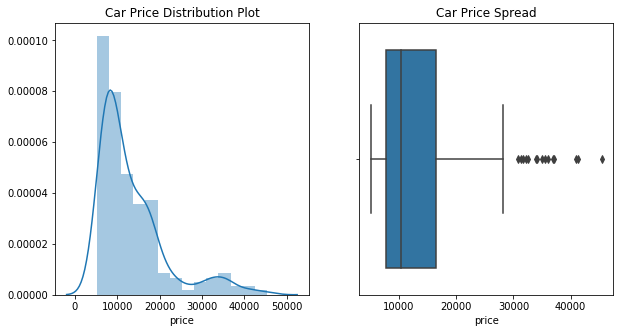

In [167]:
plt.figure(figsize=(10,5))                                 #adjusting the figure size

plt.subplot(1,2,1)                                         #creating sub-plot number 1
plt.title('Car Price Distribution Plot')                   #Setting the title Car Price Distribution Plot
sns.distplot(df.price)                                     #Creating a distribution plot for the column price

plt.subplot(1,2,2)                                         #creating sub-plot number 2
plt.title('Car Price Spread')                              #Setting the title Car Price Spread
sns.boxplot(df.price)                                      #Creating a boxplot plot for the column price

plt.show()                                                 #displaying the graphs

### Inferences:
1. Car price is skewed towards right
2. Most of the car prices are around 15,000
3. The variation in car prices is large

**(ii) Building correlations to find relation with price and between variables**

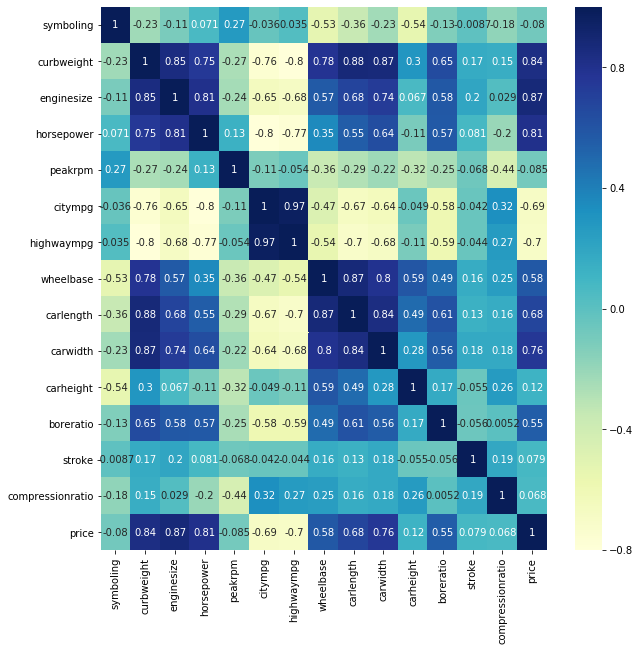

In [168]:
fig, ax = plt.subplots(figsize=(10,10))                               #Setting the figure size
sns.heatmap(numeric.corr(), cmap="YlGnBu", annot = True)              #Creating a heatmap with correlation numbers mentioned
plt.show()                                                            #Displaying the graph

### Visualising Categorical Variables

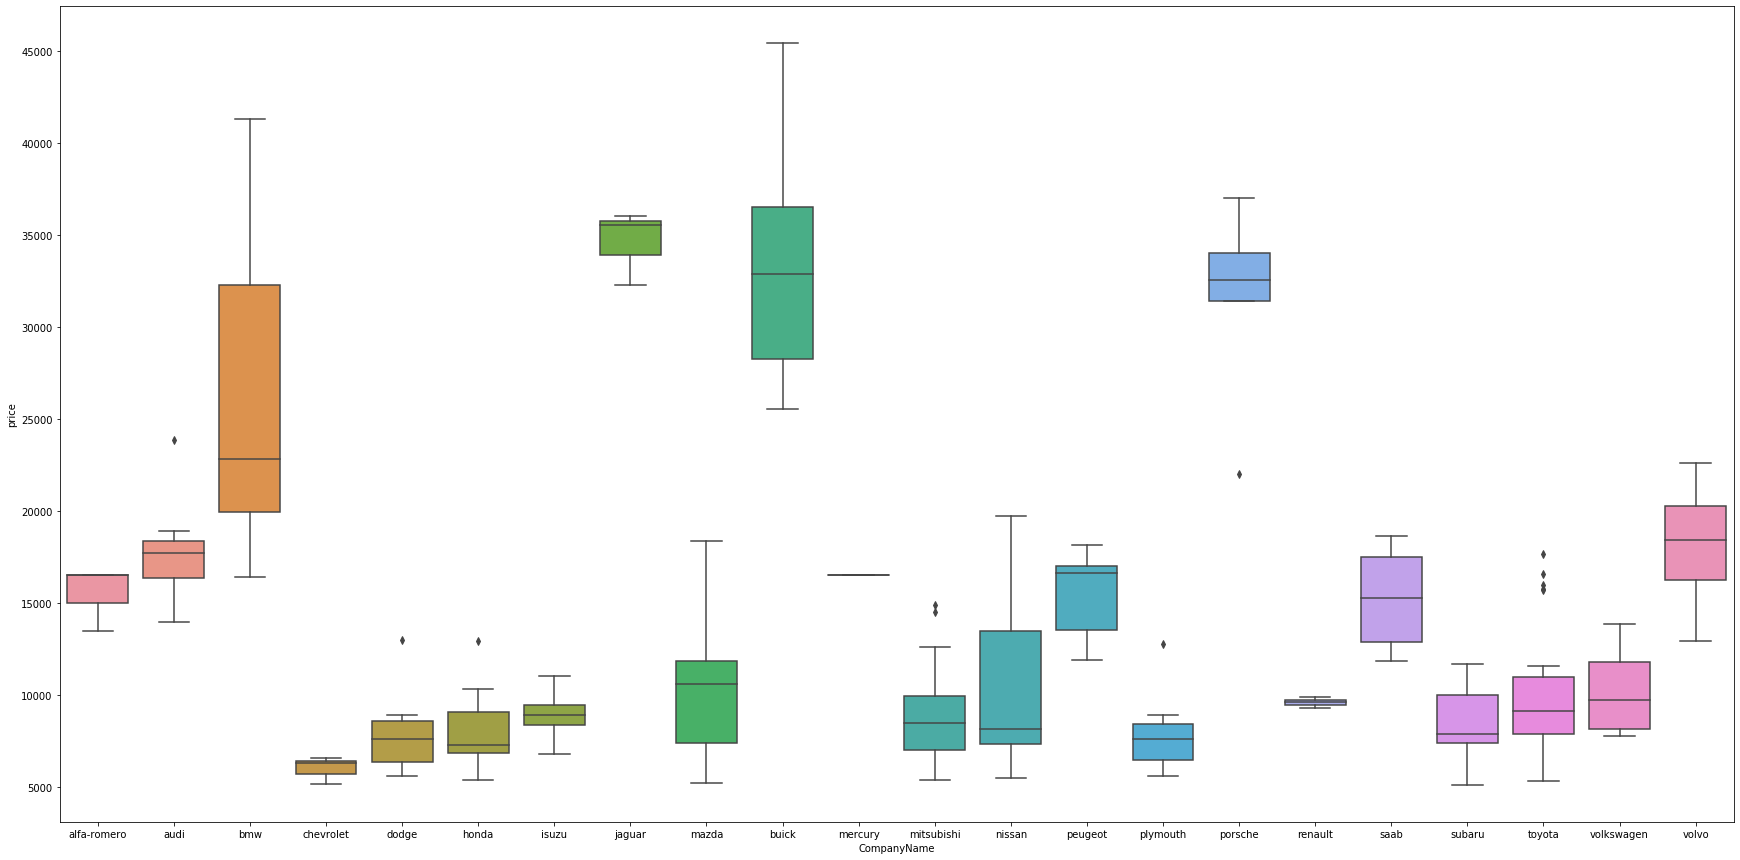

In [169]:
plt.figure(figsize=(30, 15))                                       #Setting the figure size
sns.boxplot(x = 'CompanyName', y = 'price', data = df)             #Creating a boxplot of Company Names with price
plt.show()                                                         #Displaying the graph

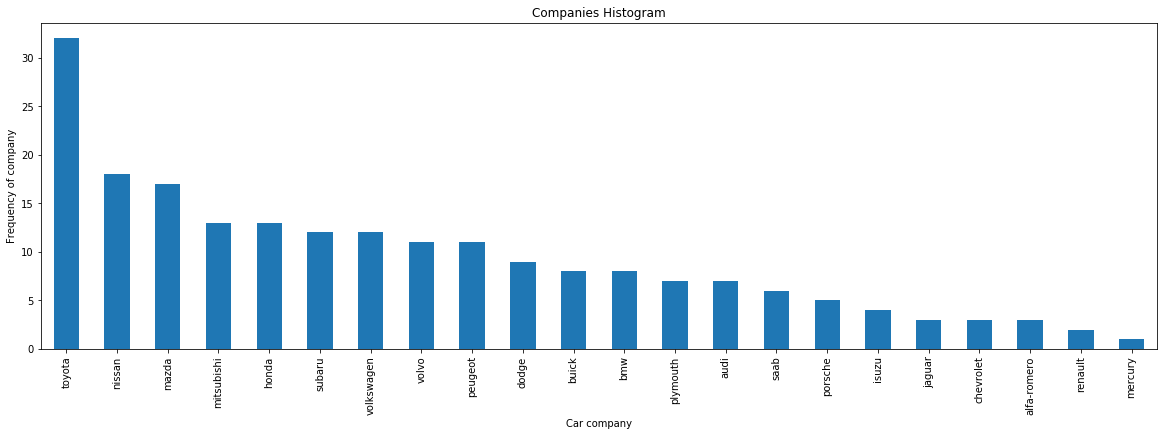

In [170]:
plt.figure(figsize=(20, 6))                                      #Setting the figure size

plt1 = df.CompanyName.value_counts().plot('bar')                 #Creating a bar plot with highest value first
plt.title('Companies Histogram')                                 #Setting the title
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')  #Setting x and y label
plt.show()                                                       #Displaying the graph

### Inferences:

Toyota is the leader in all companies in terms of price

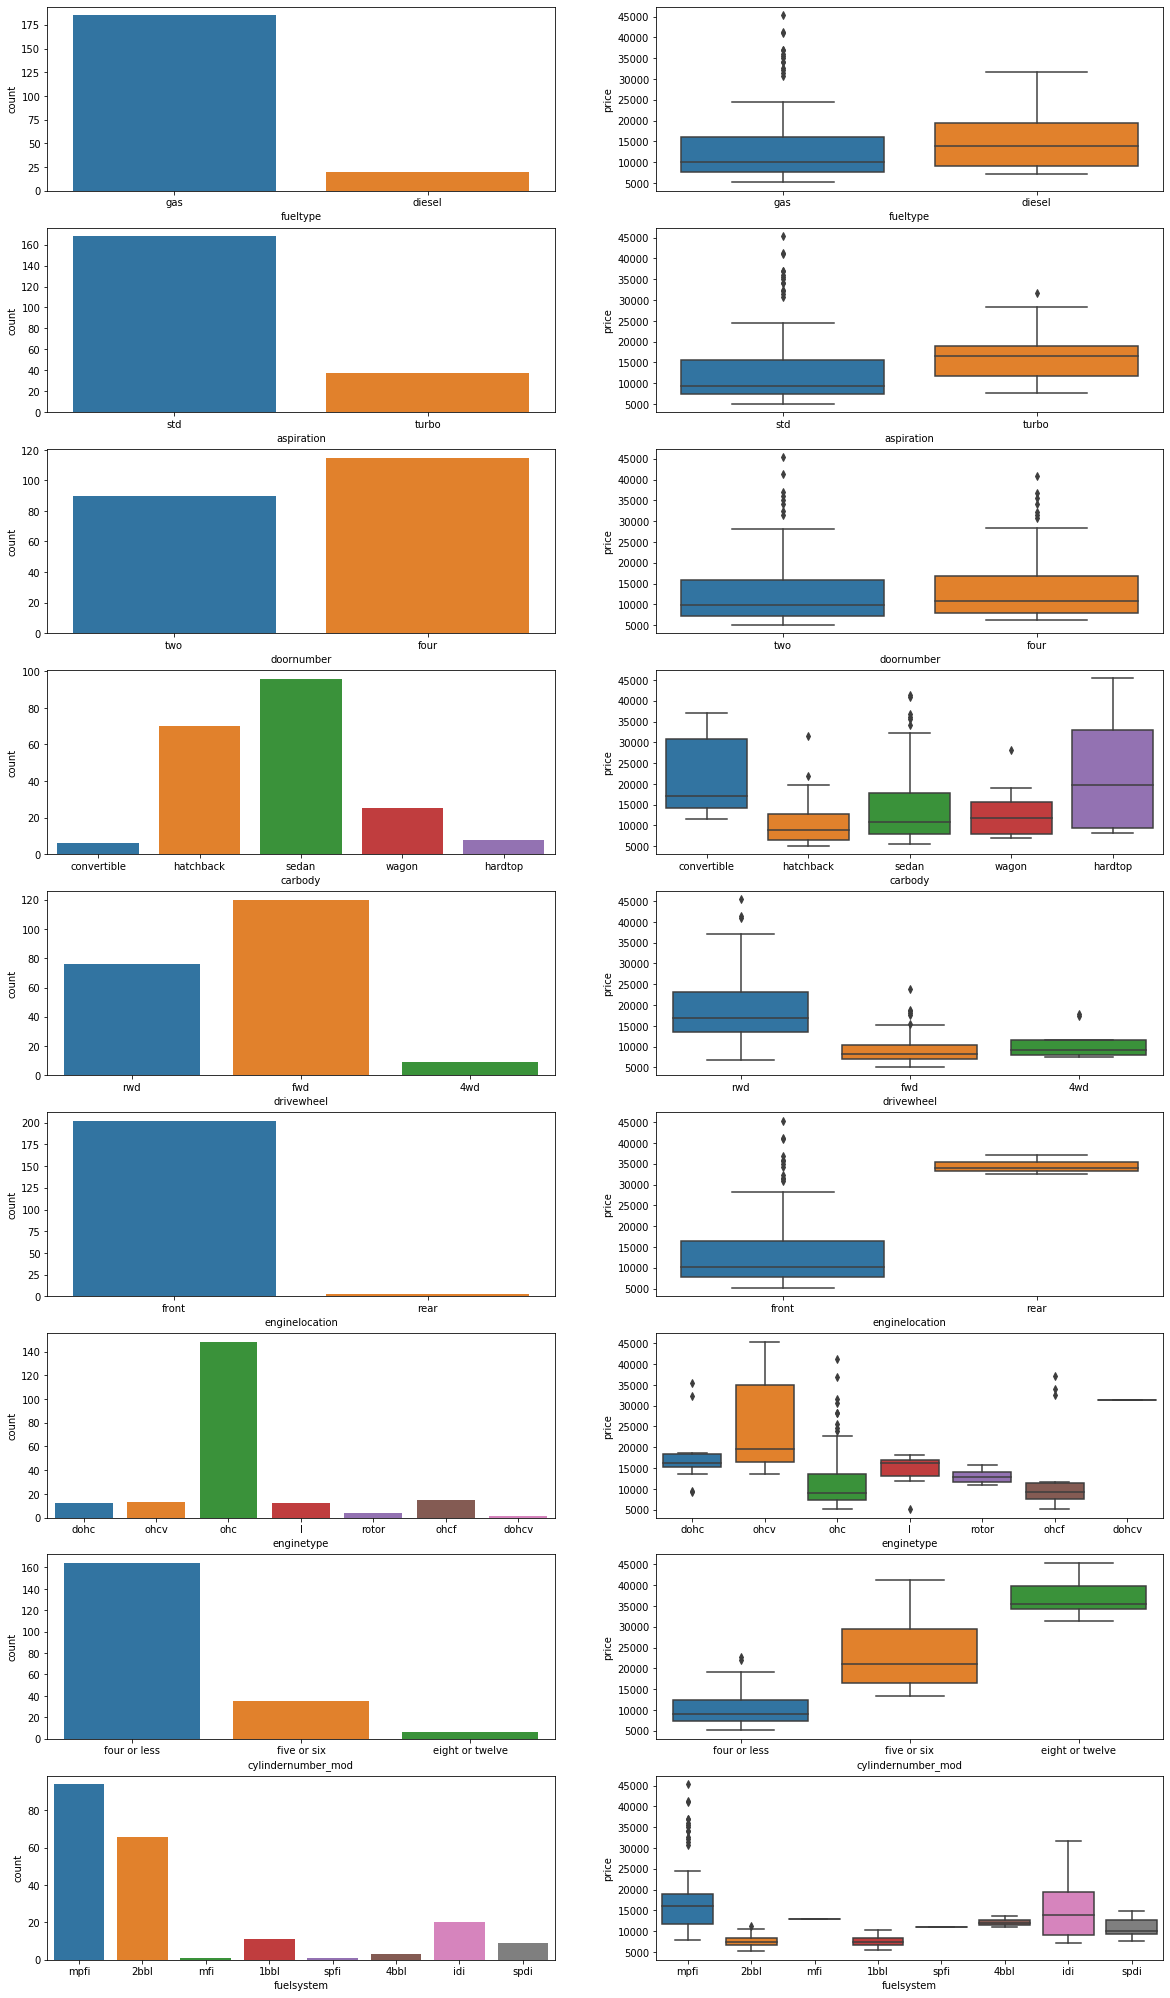

In [171]:
#Creating count plots and box plots for all categorical variables

#Identifying the columns
plot_cols=['fueltype', 'aspiration', 'doornumber', 'carbody','drivewheel', 'enginelocation', 'enginetype', 'cylindernumber_mod',
       'fuelsystem']
plt.figure(figsize=(20, 40))                        #Setting the figure size
i=1                                                 #Initializin the variable
for j in plot_cols:                                 #Creating a loop for all the columns
    plt.subplot(10,2,i)                             #Creating sub-plot
    sns.countplot(df[j])                            #Creating count plots for all categorical variables
    plt.subplot(10,2,i+1)                           #Creating adjacent sub-plot
    sns.boxplot(x = j, y = 'price', data = df)      #Creating adjacent box plot for the variable
    i=i+2                                           #Incrementing the variable i for next sub-plot
plt.show()                                          #Displaying all the graphs

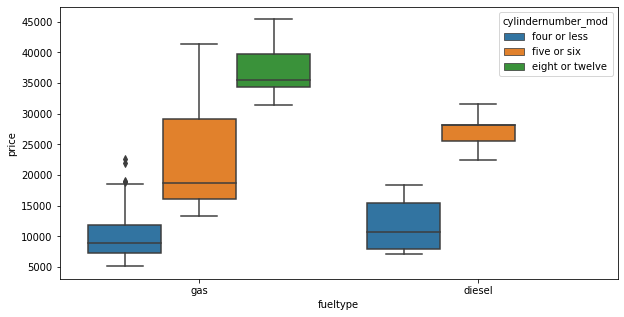

In [172]:
#Creating box plots for fueltype vs price with categories based on number of cylinders
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fueltype', y = 'price', hue = 'cylindernumber_mod', data = df)
plt.show()

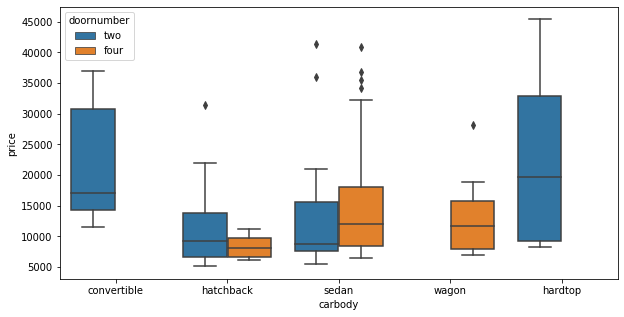

In [173]:
#Creating box plots for car body vs price with categories based on number of doors
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'doornumber', data = df)
plt.show()

### Inferences:

1. Number of gas fueled cars are more than diesel.
2. sedan is the top car body type prefered.
3. Cars with engine location at the front are more preferred
4. Cars with 4 or less cylinders are the most common
5. mpfi is the market leader
6. ohc Engine type seems to be most favored type.
7. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.
8. doornumber variable is not affecting the price much. There is no sugnificant difference between the categories in it.
9. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)
10. Very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.


# Data Preparation

Converting the categorial variables to their numeric counterparts

In [174]:
#Mapping the variables fueltype, aspiration, doornumber , enginelocation to their repsective numerics
df[['fueltype']]=df[['fueltype']].apply(lambda x: x.map({'gas': 0, 'diesel': 1}))
df[['aspiration']]=df[['aspiration']].apply(lambda x: x.map({'std': 0, 'turbo': 1}))
df[['doornumber']]=df[['doornumber']].apply(lambda x: x.map({'two': 0, 'four': 1}))
df[['enginelocation']]=df[['enginelocation']].apply(lambda x: x.map({'front': 0, 'rear': 1}))

In [175]:
#Viewing the dataframe
df.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernumber_mod
0,alfa-romero,3,0,0,0,convertible,rwd,0,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,four or less
1,alfa-romero,3,0,0,0,convertible,rwd,0,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,four or less
2,alfa-romero,1,0,0,0,hatchback,rwd,0,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,five or six
3,audi,2,0,0,1,sedan,fwd,0,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,four or less
4,audi,2,0,0,1,sedan,4wd,0,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,five or six


In [176]:
# Retrieving frequency distribution for the categorical variables (unique values)
cat_var=df.select_dtypes(include='object').columns
for i in cat_var:
    print(df[i].value_counts().to_frame(),end='\n\n')

             CompanyName
toyota                32
nissan                18
mazda                 17
mitsubishi            13
honda                 13
subaru                12
volkswagen            12
volvo                 11
peugeot               11
dodge                  9
buick                  8
bmw                    8
plymouth               7
audi                   7
saab                   6
porsche                5
isuzu                  4
jaguar                 3
chevrolet              3
alfa-romero            3
renault                2
mercury                1

             carbody
sedan             96
hatchback         70
wagon             25
hardtop            8
convertible        6

     drivewheel
fwd         120
rwd          76
4wd           9

       enginetype
ohc           148
ohcf           15
ohcv           13
l              12
dohc           12
rotor           4
dohcv           1

      fuelsystem
mpfi          94
2bbl          66
idi           20
1bbl          11
sp

### Dummy Variables

In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert categorical variables to 1s and 0s

In [177]:
#Identifying the categorical columns
l=['CompanyName','carbody','drivewheel','enginetype','cylindernumber_mod','fuelsystem','symboling']

#Defining a loop creating dummy variables for all categorical variables, joins the dummy df to parent one and drops the original column
for i in l:
    df_i=pd.get_dummies(df[i])
    df_i=pd.get_dummies(df[i], drop_first = True)
    df = pd.concat([df, df_i], axis = 1)
    df.drop([i], axis = 1, inplace = True)

In [178]:
#Renaming the symboling column to their repective names for better reading
df=df.rename(columns={-1: "Symboling_-1", 0: "Symboling_0",1:"Symboling_1",2:"Symboling_2",3:"Symboling_3"})

In [179]:
#Viewing the dataframe
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,idi,mfi,mpfi,spdi,spfi,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
0,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,1,0,0,0,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [180]:
#Splitting our parent data into train and test for model training and evaluation
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Here we can see that except for `price`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

Here we are using MinMax Scaling

In [181]:
#importing the required packages for rescaling
from sklearn.preprocessing import MinMaxScaler

#creating an object
scaler = MinMaxScaler()

In [182]:
#Scaling only those numeric variables which are not dummy or Yes/No
num_vars=['curbweight','enginesize', 'horsepower', 'peakrpm', 
          'citympg', 'highwaympg','wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price']

In [183]:
#Fitting and then transforming the data to scale all the numeric variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [184]:
#Checking the dataframe df_train
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,idi,mfi,mpfi,spdi,spfi,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
122,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,0,0,0,0,0,1,0,0
125,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,1,0,0,0,0,0,0,1
166,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,1,0,0,0,0,0,0,1
199,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,1,0,0,1,0,0,0,0


In [185]:
#checking the statistics of dataframe df_train
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,idi,mfi,mpfi,spdi,spfi,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.090909,0.0,0.440559,0.041958,0.0,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.288490,0.0,0.498199,0.201198,0.0,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [186]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [187]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [188]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE with top 25 variables
rfe = rfe.fit(X_train, y_train)

In [189]:
#Finding te top 25 variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 17),
 ('doornumber', False, 33),
 ('enginelocation', True, 1),
 ('wheelbase', False, 10),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 28),
 ('highwaympg', False, 15),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 18),
 ('dodge', False, 4),
 ('honda', False, 6),
 ('isuzu', False, 27),
 ('jaguar', False, 16),
 ('mazda', False, 30),
 ('mercury', False, 38),
 ('mitsubishi', True, 1),
 ('nissan', False, 31),
 ('peugeot', True, 1),
 ('plymouth', False, 3),
 ('porsche', True, 1),
 ('renault', False, 2),
 ('saab', True, 1),
 ('subaru', False, 7),
 ('toyota', False, 29),
 ('volkswagen', False, 32),
 ('volvo', True, 1),
 ('hardtop', False, 12),
 ('hatchback', False, 11),
 ('sedan', False

In [190]:
#Storing the top variables into col
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'audi', 'bmw', 'buick', 'mitsubishi', 'peugeot', 'porsche',
       'saab', 'volvo', 'dohcv', 'l', 'rotor', 'five or six', 'four or less',
       'idi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [191]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [192]:
# Adding a constant variable  
X_train_rf = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rf).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     100.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.93e-67
Time:                        23:32:07   Log-Likelihood:                 236.04
No. Observations:                 143   AIC:                            -422.1
Df Residuals:                     118   BIC:                            -348.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2971      0.095  

### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `horsepower` as it has a very high p-value of `0.355`. Let's go ahead and drop this variable

In [193]:
#Dropping the variable horsepower
X_train_new = X_train_rfe.drop(["horsepower"], axis = 1)

Rebuilding the model without `horsepower`

In [194]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     104.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.79e-68
Time:                        23:32:07   Log-Likelihood:                 235.52
No. Observations:                 143   AIC:                            -423.0
Df Residuals:                     119   BIC:                            -351.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3122      0.094  

### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `carheight` as it has a very high p-value of `0.079`. Let's go ahead and drop this variable

In [195]:
#Dropping the variable careheight
X_train_new = X_train_new.drop(['carheight'], axis=1)

Rebuidling the model without `carheight`

In [196]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.56e-68
Time:                        23:32:07   Log-Likelihood:                 233.66
No. Observations:                 143   AIC:                            -421.3
Df Residuals:                     120   BIC:                            -353.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3506      0.092  

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [197]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [198]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,fueltype,inf
22,idi,inf
7,compressionratio,110.03
21,four or less,82.96
3,curbweight,69.54
4,enginesize,66.58
2,carwidth,54.42
5,boreratio,39.41
6,stroke,36.13
20,five or six,14.04


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the VIF dataframe, some variables have very high VIF value. One of these variables is, `fueltype`. Let's go ahead and drop this variable

In [199]:
#Dropping the variable fueltype
X_train_new = X_train_new.drop(['fueltype'], axis=1)

In [200]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.56e-68
Time:                        23:32:07   Log-Likelihood:                 233.66
No. Observations:                 143   AIC:                            -421.3
Df Residuals:                     120   BIC:                            -353.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3506      0.092  

In [201]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
6,compressionratio,110.03
20,four or less,82.96
21,idi,80.70
2,curbweight,69.54
3,enginesize,66.58
1,carwidth,54.42
4,boreratio,39.41
5,stroke,36.13
19,five or six,14.04
12,peugeot,12.87


### Dropping the variable and updating the model

As you can see from the VIF dataframe, some variables have very high VIF value. One of these variables is, `compressionratio` which has VIF of `110.03`. Let's go ahead and drop this variable

In [202]:
#Dropping the variable compressionratio
X_train_new = X_train_new.drop(['compressionratio'], axis=1)

In [203]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     102.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.04e-66
Time:                        23:32:07   Log-Likelihood:                 226.41
No. Observations:                 143   AIC:                            -408.8
Df Residuals:                     121   BIC:                            -343.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4374      0.093     -4.

In [204]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
2,curbweight,59.95
1,carwidth,51.24
3,enginesize,43.21
19,four or less,42.14
4,boreratio,29.97
5,stroke,26.79
11,peugeot,12.41
6,peakrpm,10.35
16,l,9.81
18,five or six,9.76


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `idi` as it has a very high p-value of `0.120`. Let's go ahead and drop this variable

In [205]:
#Dropping the variable idi
X_train_new = X_train_new.drop(['idi'], axis=1)

In [206]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.29e-67
Time:                        23:32:08   Log-Likelihood:                 224.98
No. Observations:                 143   AIC:                            -408.0
Df Residuals:                     122   BIC:                            -345.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4546      0.093     -4.

In [207]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
2,curbweight,59.91
1,carwidth,51.14
3,enginesize,42.92
19,four or less,41.47
4,boreratio,29.73
5,stroke,25.49
11,peugeot,12.21
16,l,9.81
18,five or six,9.55
6,peakrpm,8.02


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `peakrpm` as it has a very high p-value of `0.076`. Let's go ahead and drop this variable

In [208]:
#Dropping the variable peakrpm
X_train_new = X_train_new.drop(['peakrpm'], axis=1)

In [209]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.49e-67
Time:                        23:32:08   Log-Likelihood:                 223.13
No. Observations:                 143   AIC:                            -406.3
Df Residuals:                     123   BIC:                            -347.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4192      0.092     -4.

In [210]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
2,curbweight,59.40
1,carwidth,50.61
3,enginesize,40.08
18,four or less,29.75
4,boreratio,25.42
5,stroke,24.83
10,peugeot,12.19
15,l,9.81
17,five or six,8.35
11,porsche,3.36


### Dropping the variable and updating the model

As you can see from the VIF dataframe, some variables have very high VIF value. One of these variables is, `curbweight` which has VIF of `59.40`. Let's go ahead and drop this variable

In [211]:
#Dropping the variable curbweight
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [212]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.68e-65
Time:                        23:32:08   Log-Likelihood:                 213.43
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     124   BIC:                            -332.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4988      0.096     -5.

In [213]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
1,carwidth,46.59
17,four or less,29.47
2,enginesize,26.77
4,stroke,24.80
3,boreratio,24.61
9,peugeot,11.27
14,l,9.77
16,five or six,7.54
10,porsche,3.35
13,dohcv,2.30


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `mitsubishi` as it has a very high p-value of `0.056`. Let's go ahead and drop this variable

In [214]:
#Dropping the variable mitsubishi
X_train_new = X_train_new.drop(['mitsubishi'], axis=1)

In [215]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.38e-65
Time:                        23:32:08   Log-Likelihood:                 211.31
No. Observations:                 143   AIC:                            -386.6
Df Residuals:                     125   BIC:                            -333.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4849      0.096     -5.

In [216]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
1,carwidth,46.59
16,four or less,29.17
2,enginesize,26.73
3,boreratio,24.54
4,stroke,23.81
8,peugeot,11.27
13,l,9.77
15,five or six,7.35
9,porsche,3.35
12,dohcv,2.30


### Dropping the variable and updating the model

As you can see from the VIF dataframe, some variables have very high VIF value. One of these variables is, `carwidth` which has VIF of `46.59`. Let's go ahead and drop this variable

In [217]:
#Dropping the variable carwidth
X_train_new = X_train_new.drop(['carwidth'], axis=1)

In [218]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     91.04
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.92e-61
Time:                        23:32:08   Log-Likelihood:                 197.88
No. Observations:                 143   AIC:                            -361.8
Df Residuals:                     126   BIC:                            -311.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3905      0.103     -3.

In [219]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
15,four or less,25.55
2,boreratio,24.10
3,stroke,23.47
1,enginesize,18.08
7,peugeot,9.57
12,l,9.26
14,five or six,6.50
8,porsche,3.28
11,dohcv,2.15
0,enginelocation,2.10


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `peugeot` as it has a very high p-value of `0.762`. Let's go ahead and drop this variable

In [220]:
#Dropping the variable peugeot
X_train_new = X_train_new.drop(['peugeot'], axis=1)

In [221]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     97.80
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.07e-62
Time:                        23:32:08   Log-Likelihood:                 197.83
No. Observations:                 143   AIC:                            -363.7
Df Residuals:                     127   BIC:                            -316.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3840      0.101     -3.

In [222]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
14,four or less,25.00
2,boreratio,23.49
3,stroke,23.40
1,enginesize,18.08
13,five or six,6.36
7,porsche,3.27
10,dohcv,2.14
0,enginelocation,2.10
6,buick,1.40
4,audi,1.39


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `enginelocation` as it has a very high p-value of `0.097`. Let's go ahead and drop this variable

In [223]:
#Dropping the variable enginelocation
X_train_new = X_train_new.drop(['enginelocation'], axis=1)

In [224]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.55e-62
Time:                        23:32:08   Log-Likelihood:                 196.27
No. Observations:                 143   AIC:                            -362.5
Df Residuals:                     128   BIC:                            -318.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3788      0.102     -3.731   

In [225]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
13,four or less,24.74
1,boreratio,23.28
2,stroke,23.14
0,enginesize,17.97
12,five or six,6.16
6,porsche,1.73
9,dohcv,1.71
5,buick,1.40
3,audi,1.39
4,bmw,1.32


### Dropping the variable and updating the model

As you can see from the VIF dataframe, some variables have very high VIF value. One of these variables is, `four or less` which has VIF of `24.74`. Let's go ahead and drop this variable

In [226]:
#Dropping the variable four or less
X_train_new = X_train_new.drop(['four or less'], axis=1)

In [227]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.25e-61
Time:                        23:32:09   Log-Likelihood:                 190.21
No. Observations:                 143   AIC:                            -352.4
Df Residuals:                     129   BIC:                            -310.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0489      0.027     -1.780      

In [228]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,enginesize,11.09
1,boreratio,10.01
2,stroke,5.40
12,five or six,3.06
6,porsche,1.73
9,dohcv,1.55
3,audi,1.37
4,bmw,1.32
5,buick,1.27
10,l,1.20


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `dohcv` as it has a very high p-value of `0.849`. Let's go ahead and drop this variable

In [229]:
#Dropping the variable dohcv
X_train_new = X_train_new.drop(['dohcv'], axis=1)

In [230]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     111.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.07e-62
Time:                        23:32:09   Log-Likelihood:                 190.19
No. Observations:                 143   AIC:                            -354.4
Df Residuals:                     130   BIC:                            -315.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0488      0.027     -1.781      

In [231]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,enginesize,10.86
1,boreratio,9.94
2,stroke,5.40
11,five or six,2.97
3,audi,1.36
4,bmw,1.32
5,buick,1.27
6,porsche,1.22
9,l,1.20
8,volvo,1.19


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `five or six` as it has a very high p-value of `0.695`. Let's go ahead and drop this variable

In [232]:
#Dropping the variable five or six
X_train_new = X_train_new.drop(['five or six'], axis=1)

In [233]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.92e-63
Time:                        23:32:09   Log-Likelihood:                 190.10
No. Observations:                 143   AIC:                            -356.2
Df Residuals:                     131   BIC:                            -320.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0491      0.027     -1.801      0.0

In [234]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
1,boreratio,8.57
0,enginesize,7.33
2,stroke,5.40
5,buick,1.27
6,porsche,1.22
9,l,1.19
4,bmw,1.18
8,volvo,1.17
10,rotor,1.14
7,saab,1.08


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `stroke` as it has a very high p-value of `0.690`. Let's go ahead and drop this variable

In [235]:
#Dropping the variable stroke
X_train_new = X_train_new.drop(['stroke'], axis=1)

In [236]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     135.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.64e-64
Time:                        23:32:09   Log-Likelihood:                 190.02
No. Observations:                 143   AIC:                            -358.0
Df Residuals:                     132   BIC:                            -325.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0579      0.016     -3.624      0.0

In [237]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
1,boreratio,6.57
0,enginesize,6.45
4,buick,1.24
8,l,1.18
3,bmw,1.15
7,volvo,1.13
9,rotor,1.13
5,porsche,1.11
6,saab,1.07
2,audi,1.06


### Dropping the Variable and Updating the Model

As you can see from the summary dataframe, some variables are still insignificant. One of these variables is, `boreratio` as it has a very high p-value of `0.178`. Let's go ahead and drop this variable

In [238]:
#Dropping the variable boreratio
X_train_new = X_train_new.drop(['boreratio'], axis=1)

In [239]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.19e-65
Time:                        23:32:09   Log-Likelihood:                 189.03
No. Observations:                 143   AIC:                            -358.1
Df Residuals:                     133   BIC:                            -328.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0732      0.011     -6.454      0.0

In [240]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,enginesize,1.70
3,buick,1.21
2,bmw,1.15
4,porsche,1.09
6,volvo,1.09
7,l,1.09
1,audi,1.06
5,saab,1.02
8,rotor,1.00


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [241]:
#Final columns from train model
X_train_new.columns

Index(['enginesize', 'audi', 'bmw', 'buick', 'porsche', 'saab', 'volvo', 'l',
       'rotor'],
      dtype='object')

In [242]:
#Checking the number of independent variables
X_train_lm.shape

(143, 10)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [243]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

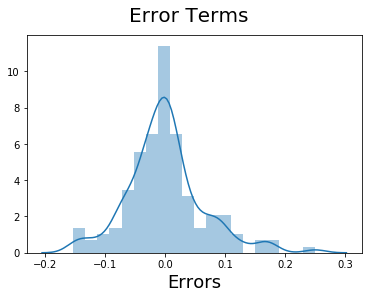

In [244]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt,show()

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [245]:
num_vars=['curbweight','enginesize', 'horsepower', 'peakrpm', 
          'citympg', 'highwaympg','wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [246]:
#Checking the statistics of test dataframe
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,idi,mfi,mpfi,spdi,spfi,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.112903,0.177419,0.564516,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,...,0.112903,0.016129,0.500000,0.048387,0.016129,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,...,0.319058,0.127000,0.504082,0.216335,0.127000,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
#Checking the test dataframe
df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,idi,mfi,mpfi,spdi,spfi,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
160,0,0,1,0,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,...,0,0,0,0,0,0,1,0,0,0
186,0,0,1,0,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,...,0,0,1,0,0,0,0,0,1,0
59,0,0,0,0,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,...,0,0,0,0,0,0,0,1,0,0
165,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,...,0,0,1,0,0,0,0,1,0,0
140,0,0,0,0,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,...,0,0,0,0,0,0,0,0,1,0


#### Dividing into X_test and y_test

In [248]:
y_test = df_test.pop('price')
X_test = df_test

In [249]:
# Now let's use our model to make predictions.

# Creating X_test_m dataframe by selecting final variables from X_test
X_test_m= X_test[['enginesize', 'audi', 'bmw', 'buick', 'porsche', 'saab', 'volvo', 'l',
       'rotor']]

In [250]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test_m)

In [251]:
# Making predictions using the final model

y_pred_m = lm.predict(X_test_m)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

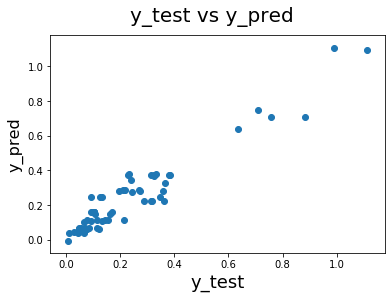

In [252]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

In [253]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.19e-65
Time:                        23:32:11   Log-Likelihood:                 189.03
No. Observations:                 143   AIC:                            -358.1
Df Residuals:                     133   BIC:                            -328.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0732      0.011     -6.454      0.0


We can see that the equation of our best fitted line is:

$ price = -0.0732 + 0.9980  \times  enginesize + 0.1661  \times  audi + 0.2651 \times bmw + 0.2500 \times buick + 0.2789 \times porsche + 0.1293 \times saab + 0.1419 \times volvo + 0.0723 \times l + 0.2482 \times rotor $

In [254]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_m)

0.9147172769074047

## Inference :

1. R-sqaured and Adjusted R-squared (extent of fit) - 0.910 and 0.904 - 91% variance explained.
2. F-stats and Prob(F-stats) (overall model fit) - 149.2.0 and 5.19e-65(approx. 0.0) - Model fit is significant and explains 91% variance which states that it's just not by chance.
3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.